# Arboles de decision para especies de flores 


In [39]:
import numpy as np

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
data  =  pd.read_csv("datasets/iris/iris.csv")

In [42]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

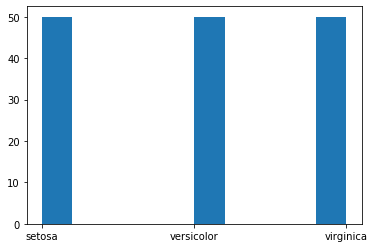

In [44]:
plt.hist(data["Species"])

In [45]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
colnames = data.columns.values.tolist()

In [47]:
predictors = colnames[:4]

In [48]:
target = colnames[4]

In [49]:
target

'Species'

In [86]:
data["is_train"] = (np.random.uniform(0,1, len(data))<=0.75).astype(int)

(array([ 45.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

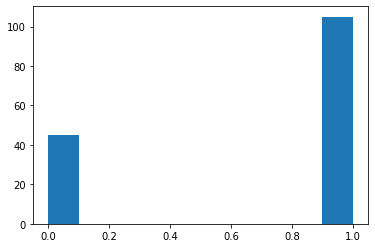

In [87]:
plt.hist(data.is_train)

(array([ 45.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

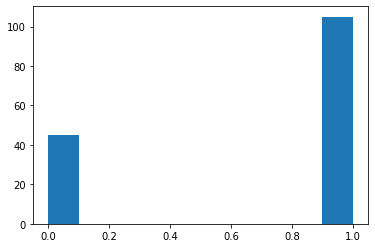

In [88]:
plt.hist(data["is_train"])

In [89]:
data["is_train"]

0      1
1      0
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: is_train, Length: 150, dtype: int32

In [90]:
train , test =data[data["is_train"]==True] , data[data["is_train"]==False]

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
tree = DecisionTreeClassifier(criterion =  "entropy" ,min_samples_split = 20 ,random_state = 99)

In [93]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [94]:
preds =tree.predict(test[predictors])

In [59]:
pd.crosstab(test[target], preds ,rownames=["Actual"],  colnames=["Predictors"])

Predictors,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,9,0
virginica,0,2,9


# Visualizacion del arbol de decision

In [60]:
from sklearn.tree import export_graphviz

In [61]:
with open("notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

import os
path = "C:/Program Files (x86)/Graphviz2.37/bin"
os.environ["PATH"] += os.pathsep + path

from graphviz import Source

In [62]:
import os 
from graphviz import Source

In [63]:
file = open("notebooks/resources/iris_dtree.dot", "r")
text =file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 117\\nvalue = [37, 41, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 41, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.365\\nsamples = 43\\nvalue = [0, 40, 3]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 38, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 1.0\\nsamples = 4\\nvalue = [0, 2, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8 ->

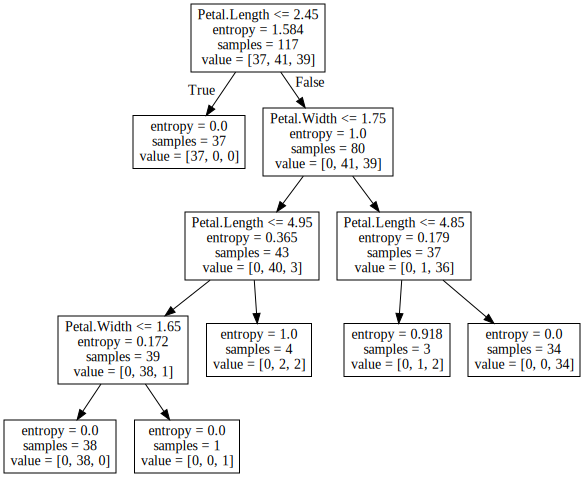

In [64]:
Source(text)

In [65]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
from graphviz import Source

In [66]:
file = open("notebooks/resources/iris_dtree.dot", "r")
text =file.read()

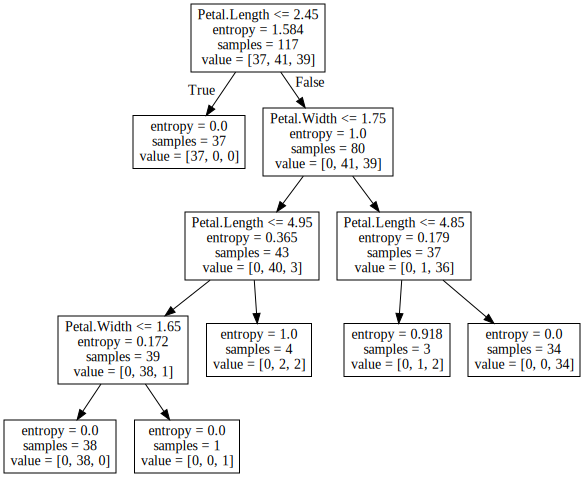

In [67]:
Source(text)

# Cross Validation para la poda

In [68]:
X = data[predictors]
Y = data[target]

In [69]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5 , min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [70]:
from sklearn.model_selection import KFold

In [71]:
cv =  KFold(n_splits= 10, shuffle=True, random_state=1)



In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(tree, X , Y , scoring ="accuracy", cv = cv , n_jobs=1)

In [74]:
score = np.mean(scores)
score

0.9333333333333333

In [75]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)

    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)


Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [76]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest para arboles de clasificacion

In [80]:
from sklearn.ensemble import RandomForestClassifier


In [83]:
forest =  RandomForestClassifier(n_jobs=2, oob_score=True , n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [84]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [0.97297297, 0.02702703, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97435897, 0.02564103, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96875   , 0.03125   , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97222222, 0.02777778, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [85]:
forest.oob_score_

0.96